# Raster fire scar assessment - working

In [ ]:
import geopandas as gpd
import os
import shutil
import glob
import pandas as pd
import numpy as np
import rasterio as rio
import rasterio.plot
import pyproj
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
#import earthpy as ep
#import earthpy.plot as ep
import seaborn as sns
import fiona
import rasterstats
from rasterstats import zonal_stats


# Prettier plotting with seaborn
sns.set(font_scale=1.5, style="white")

List and copy the NAFI raster images

In [ ]:

def listdir(dirname,endfilename,scratchDir):
    """
    this function will return a list of files in a directory for the given file extention "endfilename". 
    """
    list_img = []
    
    #os.mkdir(scratchDir)
     
    for root, dirs, files in os.walk(dirname):
        for file in files:
            if file.endswith(endfilename):
                img = (os.path.join(root, file))
                list_img.append(img)
                #print (img)
                #shutil.copy(os.path.abspath(img), scratchDir)
    print("Script has finished")
    return list_img

dirname = r'U:\Working\Rangelands\Spatial Data\NAFI Firescars'
endfilename = '.tif'
scratchDir = r'Z:\Scratch\Zonal_Stats_Pipeline\Firescars\NAFI_fire_rasters'

listdir(dirname,endfilename,scratchDir)

In [ ]:
f_path = 'U:\\Working\\Rangelands\\Spatial Data\\NAFI Firescars\\2000 firescars\\Raster\\FS2000_MTH.tif'

In [ ]:
# Open DTM and DSM files
with rio.open(f_path) as src:
    fire_im = src.read(1, masked=True)
    #spatial_extent = plotting_extent(src)

In [ ]:
fire_im

In [ ]:
fire_im.ndim

In [ ]:
fire_im.size

In [ ]:
fire_im.shape

In [ ]:
cadastre = gpd.read_file(r'U:\LIB_Common\Cadastre\Datasets\Av_data\Cadastre.shp')
cadastre.head()

In [ ]:

cmap = {1: 'Jan', 2: 'Feb', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
zs = zonal_stats(r"Z:\Scratch\Zonal_Stats_Pipeline\shapefiles\property\new\property_birrimba_GDA94.shp",r"U:\Working\Rangelands\Spatial Data\NAFI Firescars\2020 firescars\fs2020.tif", categorical=True, category_map=cmap, nodata = 255)

for zone in zs:
    # extract "values" as a tuple from a dictonary
    keys, values = zip(*zone.items())
    print(keys)
    print(values)


In [ ]:

zonal_stats(r'C:\Users\rmcgr\Desktop\firemaps\Moroak_GCS1994_GDA.shp','U:\\Working\\Rangelands\\Spatial Data\\NAFI Firescars\\2001 firescars\\Raster\\FS2001_MTH.tif', categorical=True, nodata = 0.0)

In [ ]:
import geopandas as gpd
import os
import shutil
import glob
import pandas as pd
import numpy as np
import rasterio as rio
import rasterio.plot
import pyproj
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
#import earthpy as ep
#import earthpy.plot as ep
import seaborn as sns
import fiona
import rasterstats
from rasterstats import zonal_stats


# Prettier plotting with seaborn
sns.set(font_scale=1.5, style="white")


def listdir(dirname,endfilename,scratchDir):
    """
    this function will return a list of files in a directory for the given file extention "endfilename". 
    """
    list_img = []
     
    for root, dirs, files in os.walk(dirname):
        for file in files:
            if file.endswith(endfilename):
                img = (os.path.join(root, file))
                list_img.append(img)
                #print (img)
                shutil.copy(os.path.abspath(img), scratchDir)
    print("Script has finished")
    return list_img

dirname = r'U:\Working\Rangelands\Spatial Data\NAFI Firescars'
endfilename = 'MTH.tif'
scratchDir = r'C:\Users\rmcgr\Desktop\firemaps\scratch'

listdir(dirname,endfilename,scratchDir)









imlist = r"Z:\Scratch\Zonal_Stats_Pipeline\Firescars\NAFI_fire_rasters\fire_list.csv"
shape = r"Z:\Scratch\Zonal_Stats_Pipeline\shapefiles\property\property_hayfield_output_GDA94.shp"

image_name =[]
image_date =[]
site_li =[]
zoneclass =[]
zoneresults =[]



#def mainRoutine():
        
# read in the command arguments
"""cmdargs = getCmdargs()
imlist = cmdargs.imlist
nodata= int(cmdargs.nodata)
shape = cmdargs.shape 
uid = cmdargs.uid
export_csv = cmdargs.csv""" 

# check if the "temp_individual_bands" file already exists and delete it if it does.
tempDir = 'temp_individual_bands'       
try:
    shutil.rmtree(tempDir)

except:
    print("The following directory was deleted: ", tempDir)

# create temporary folders
tempDir = 'temp_individual_bands'
os.makedirs(tempDir)

with open(imlist, "r") as imagerylist:

    #Extract each image path from the image list
    for image in imagerylist:
        print(image)

        # cleans the file pathway (Windows)
        imageS = image.rstrip()
        print("imageS: ", imageS)
        im_name = imageS[-14:]
        print(im_name)
        
        # loops through each image
        with rasterio.open(imageS, nodata= -9999) as srci:
            imageResults = 'image_' + im_name + '.csv'
            # runs the zonal stats function and outputs a csv in a band specific folder
            #finalresults = applyZonalstats(imageS, nodata, band, shape, uid)
           
            """--------------------------------------------------------------------------------------------------------------"""

            #def applyZonalstats(imageS, nodata, band, shape, uid):

            '''image_name =[]
            image_date =[]
            site_li =[]
            zoneclass =[]
            zoneresults =[]'''


            with rasterio.open(imageS, nodata=255.0) as srci:
                affine = srci.transform #srci.transform is the new srci.affine
                array = srci.read(1)

                with fiona.open(shape) as src:
                    # using "all_touched=True" will increase the number of pixels used to produce the stats "False" reduces the number

                    cmap = {1: 'Jan', 2: 'Feb', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
                    zs = zonal_stats(src, array, affine=affine, stats=['sum'],categorical=True, category_map=cmap, nodata = 255.0)
                    print(zs)
                    print(array)

                    # extract image name and append to list
                    imgName = str(srci)[-25:-10]
                    print("imgName: ", image)
                    image_name.append(image)
                    # extract image date and append to list
                    imgDate = str(srci)[-23:-19]
                    print("imgDate: ", imgDate)
                    image_date.append(imgDate)

                    for zone in zs:
                        # extract "values" as a tuple from a dictonary
                        keys, values = zip(*zone.items())
                        print(keys, values)
                        result = list(values)
                        zoneresults.append(result)
                        key = list(keys)
                        zoneclass.append(key)
                        print("Keys: ", keys)
                        print("Values: ", values)
                        """if values >= 1:
                            result = list(values)
                            zoneresults.append(result)
                            key = list(keys)
                            zoneclass.append(key)
                            print("Keys: ", keys)
                            print("Values: ", values)
                        else:
                            result = 0
                            zoneresults.append(result)
                            key = 0
                            zoneclass.append(key)
                            print("Keys: ", keys)
                            print("Values: ", values)"""
                            

                    for i in src:
                        # extract shapefile records
                        table_attributes = i['properties']  

                        """uid_ = table_attributes[uid]  
                        details = [uid_]
                        uid_li.append(details)"""

                        site = table_attributes["PROP_NAME"]
                        site_ = [site]
                        site_li.append(site_)

                        # join the elements in each of the lists row by row 
                        finalresults =  [site_li + zoneclass + zoneresults  for site_li,  zoneclass, zoneresults in zip(site_li, zoneclass, zoneresults)]
                        print("Final results: ", finalresults)

                        df  = pd.DataFrame.from_records(finalresults)
                        #df['band']= band
                        df['image']= imgName
                        df['date']= imgDate
                        print("DF: ", df)
                        df.to_csv(tempDir + '//' + imageResults, index=False) 

                        # close the vector and raster file 
                        #src.close() 
                        srci.close()

                        # print out the file name of the processed image
                        print (imgName + ' ' + imgDate + ' ' + str(site) + ' ' + 'zone stats are complete')

                        #return(finalresults)

                        """--------------------------------------------------------------------------------------------------------"""

                        #RETURN TO MAIN FUNCTION

                        #header = ['number', 'site', 'min', 'max', 'mean', 'count']#, 'std', 'median'

                        """df  = pd.DataFrame.from_records(finalresults)
                        #df['band']= band
                        df['image']= imgName
                        df['date']= imgDate
                        print("DF: ", df)
                        df.to_csv(tempDir + '//' + imageResults, index=False) """
        

## This is the final script as a working cell.

Loads zonal stast as a dictionary

In [ ]:
import geopandas as gpd
import os
import shutil
import glob
import pandas as pd
import numpy as np
import rasterio as rio
import rasterio.plot
import pyproj
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
#import earthpy as ep
#import earthpy.plot as ep
import seaborn as sns
import fiona
import rasterstats
from rasterstats import zonal_stats


# Prettier plotting with seaborn
#sns.set(font_scale=1.5, style="white")


def listdir(dirname,endfilename,scratchDir):
    """
    this function will return a list of files in a directory for the given file extention "endfilename". 
    """
    list_img = []
     
    for root, dirs, files in os.walk(dirname):
        for file in files:
            if file.endswith(endfilename):
                img = (os.path.join(root, file))
                list_img.append(img)
                #print (img)
                shutil.copy(os.path.abspath(img), scratchDir)
    print("Script has finished")
    return list_img

dirname = r'U:\Working\Rangelands\Spatial Data\NAFI Firescars'
endfilename = 'MTH.tif'
scratchDir = r'C:\Users\rmcgr\Desktop\firemaps\scratch'

listdir(dirname,endfilename,scratchDir)



imlist = r"Z:\Scratch\Zonal_Stats_Pipeline\Firescars\NAFI_fire_rasters\fire_list.csv"
#shape = r"T:\rob\Camfield_GCS_GDA_1994.shp"

image_name =[]
image_date =[]
site_li =[]
zoneclass =[]
zoneresults =[]



#def mainRoutine():
        
# read in the command arguments
"""cmdargs = getCmdargs()
imlist = cmdargs.imlist
nodata= int(cmdargs.nodata)
shape = cmdargs.shape 
uid = cmdargs.uid
export_csv = cmdargs.csv""" 

# check if the "temp_individual_bands" file already exists and delete it if it does.
tempDir = 'temp_individual_bands'       
try:
    shutil.rmtree(tempDir)

except:
    print("The following directory was deleted: ", tempDir)

# create temporary folders
tempDir = 'temp_individual_bands'
os.makedirs(tempDir)

with open(imlist, "r") as imagerylist:

    #Extract each image path from the image list
    for image in imagerylist:
        print(image)

        # cleans the file pathway (Windows)
        imageS = image.rstrip()
        print("imageS: ", imageS)
        im_name = imageS[60:]
        print("Im_Name: ", im_name)
        
        # loops through each image
        with rasterio.open(imageS, nodata= 255) as srci:
            imageResults = 'image_' + im_name + '.csv'
            # runs the zonal stats function and outputs a csv in a band specific folder
            #finalresults = applyZonalstats(imageS, nodata, band, shape, uid)
           
            """--------------------------------------------------------------------------------------------------------------"""

            #def applyZonalstats(imageS, nodata, band, shape, uid):

            '''image_name =[]
            image_date =[]
            site_li =[]
            zoneclass =[]
            zoneresults =[]'''

            with rasterio.open(imageS, nodata=255) as srci:
                affine = srci.transform #srci.transform is the new srci.affine
                array = srci.read(1)
                print(array)

                with fiona.open(shape) as src:
                    # using "all_touched=True" will increase the number of pixels used to produce the stats "False" reduces the number

                    cmap = {1: 'Jan', 2: 'Feb', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
                    zs = zonal_stats(src, array, affine=affine, stats=['count'],categorical=True, category_map=cmap, nodata = 255, all_touched=False)
                    
                    print("ZS: ", zs)
                    print("Array: ", array)

                    # extract image name and append to list
                    imgName = str(srci)[86:-11]
                    print("imgName: ", imgName)
                    image_name.append(imgName)
                    # extract image date and append to list
                    imgDate = str(imgName)[2:6]
                    print("imgDate: ", imgDate)
                    image_date.append(imgDate)
                    
                    df  = pd.DataFrame.from_records(zs)
                    df.insert(0, 'image', imgName)
                    df.insert(0, 'year', imgDate)
                
                    for i in src:
                        # extract shapefile records
                        table_attributes = i['properties']  

                        prop = table_attributes["PROP_NAME"]
                        df.insert(0, 'property', prop)
                        
                        print("DF: ", df)
                        df.to_csv(tempDir + '//' + imageResults, index=False) 

                        srci.close()

                        # print out the file name of the processed image
                        print (imgName + ' ' + imgDate +  ' ' + 'zone stats are complete')

                        #return(finalresults)

                        """--------------------------------------------------------------------------------------------------------"""

                        #RETURN TO MAIN FUNCTION

                        #header = ['number', 'site', 'min', 'max', 'mean', 'count']#, 'std', 'median'

                        """df  = pd.DataFrame.from_records(finalresults)
                        #df['band']= band
                        df['image']= imgName
                        df['date']= imgDate
                        print("DF: ", df)
                        df.to_csv(tempDir + '//' + imageResults, index=False) """

property_name = shape.rstrip()
print("Property name: ", property_name)
clean_prop_name = property_name[7:-17]
print("Clean_Prop_Name: ", clean_prop_name)
#r"T:\rob\Birrimba_GCS_GDA_1994.shp"
                        
                        # for loops through the band folders and concatenates zonal stat outputs into a complete band specific csv   
band_files = glob.glob(os.path.join(tempDir, "*.csv")) # advisable to use os.path.join as this makes concatenation OS independent
df_from_each_band_file = (pd.read_csv(f) for f in band_files)
concat_band_df   = pd.concat(df_from_each_band_file,ignore_index=False, axis=0, sort=False)
# export the band specific results to a csv file (i.e. three outputs)
concat_band_df.to_csv(tempDir + '//'+  "_" + clean_prop_name + ".csv",index=False)                  

                        

        

## PANDAS

In [1]:
%pylab inline
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import numpy as np
pylab.rcParams['figure.figsize'] = (30, 8.0)

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd Z:\Scratch\Zonal_Stats_Pipeline\Firescars\outputs

[WinError 3] The system cannot find the path specified: 'Z:\\Scratch\\Zonal_Stats_Pipeline\\Firescars\\outputs'
C:\Users\Rober\fire\Fire_scar\Test


In [3]:
df = pd.read_csv(r"D:\Rob\fire\outputs\output1\allTouchTrue\cattle creek_fire_scar.csv")
df2 = pd.read_csv(r"D:\Rob\fire\outputs\Bullo_River_106071_bare_ground.csv", index_col=[0])

In [4]:
df.fillna(0, inplace=True)
df.tail()

,year,image,0.0,Oct,Nov,count,property,uid_final,Laiskey,band,May,June,Sep,Dec,Jan,Feb,April,July,Aug,March
17,2017,FS2017_MTHS.tif,40581.0,4465.0,42621.0,97495,cattle creek,1,000 02654,1,0.0,0.0,0.0,9789.0,0.0,0.0,0.0,0.0,0.0,39.0
18,2018,fs2018M.tif,96461.0,265.0,0.0,97495,cattle creek,1,000 02654,1,665.0,104.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,2019,FS2019MTHS.tif,97388.0,0.0,0.0,97495,cattle creek,1,000 02654,1,0.0,0.0,0.0,107.0,0.0,0.0,0.0,0.0,0.0,0.0
20,2020,fs2020.tif,97473.0,0.0,0.0,97473,cattle creek,1,000 02654,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,2020,fs2020_classified.tif,4.0,0.0,0.0,4,cattle creek,1,000 02654,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Property Fire scars

In [5]:
df = df.drop(columns='0.0')

In [6]:
#column_list =['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [7]:
# If months dont exist add them to the dataframe

column_list =['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

for col in column_list:
    if col not in df.columns:
        df[col] = 0.0

In [8]:
#Calculate the area for each month and add a column for each

count =[]
m2 = []
ha =[]
for col in column_list:
    month_area = str(col)+'_area_ha'
    col_ =  str(col)
    df[month_area] = (df[col_]*(250*250)/10000)   

In [9]:
df

,year,image,Oct,Nov,count,property,uid_final,Laiskey,band,May,...,March_area_ha,April_area_ha,May_area_ha,June_area_ha,July_area_ha,Aug_area_ha,Sep_area_ha,Oct_area_ha,Nov_area_ha,Dec_area_ha
0,2000,FS2000_MTHS.tif,45666.0,2492.0,97495,cattle creek,1,000 02654,1,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,285412.50,15575.00,0.00
1,2001,FS2001_MTHS.tif,988.0,0.0,97495,cattle creek,1,000 02654,1,6026.0,...,0.00,0.00,37662.50,118.75,0.00,0.00,252356.25,6175.00,0.00,6518.75
2,2002,FS2002_MTHS.tif,12600.0,23831.0,97495,cattle creek,1,000 02654,1,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,64262.50,78750.00,148943.75,175.00
3,2003,FS2003_MTHS.tif,0.0,0.0,97495,cattle creek,1,000 02654,1,0.0,...,0.00,6375.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,2004,FS2004_MTHS.tif,79070.0,36.0,97495,cattle creek,1,000 02654,1,24.0,...,0.00,1400.00,150.00,0.00,50.00,0.00,0.00,494187.50,225.00,925.00
5,2005,FS2005_MTHS.tif,0.0,0.0,97495,cattle creek,1,000 02654,1,1.0,...,0.00,0.00,6.25,0.00,0.00,656.25,0.00,0.00,0.00,0.00
6,2006,FS2006_MTH.tif,5.0,50447.0,56265,cattle creek,1,000 02654,1,2862.0,...,0.00,0.00,17887.50,0.00,0.00,0.00,0.00,31.25,315293.75,18443.75
7,2007,FS2007_MTH.tif,24764.0,0.0,32877,cattle creek,1,000 02654,1,7601.0,...,0.00,0.00,47506.25,0.00,0.00,0.00,68.75,154775.00,0.00,3131.25
8,2008,FS2008_MTH.tif,0.0,0.0,97431,cattle creek,1,000 02654,1,0.0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,518.75
9,2009,FS2009_MTH.tif,0.0,25443.0,26756,cattle creek,1,000 02654,1,104.0,...,0.00,1356.25,650.00,0.00,0.00,0.00,0.00,0.00,159018.75,6200.00


In [10]:
df['annual_count'] = df[column_list].sum(axis=1)
df['annual_area_ha'] = (df['annual_count']*(250*250)/10000)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            22 non-null     int64  
 1   image           22 non-null     object 
 2   Oct             22 non-null     float64
 3   Nov             22 non-null     float64
 4   count           22 non-null     int64  
 5   property        22 non-null     object 
 6   uid_final       22 non-null     int64  
 7   Laiskey         22 non-null     object 
 8   band            22 non-null     int64  
 9   May             22 non-null     float64
 10  June            22 non-null     float64
 11  Sep             22 non-null     float64
 12  Dec             22 non-null     float64
 13  Jan             22 non-null     float64
 14  Feb             22 non-null     float64
 15  April           22 non-null     float64
 16  July            22 non-null     float64
 17  Aug             22 non-null     float

In [12]:
df.sample(5)

,year,image,Oct,Nov,count,property,uid_final,Laiskey,band,May,...,May_area_ha,June_area_ha,July_area_ha,Aug_area_ha,Sep_area_ha,Oct_area_ha,Nov_area_ha,Dec_area_ha,annual_count,annual_area_ha
8,2008,FS2008_MTH.tif,0.0,0.0,97431,cattle creek,1,000 02654,1,0.0,...,0.00,0.00,0.00,0.0,0.00,0.00,0.00,518.75,83.0,518.75
14,2014,FS2014_MTH.tif,40060.0,1559.0,97495,cattle creek,1,000 02654,1,25.0,...,156.25,0.00,0.00,0.0,175156.25,250375.00,9743.75,562.50,69759.0,435993.75
15,2015,FS2015_MTH.tif,2813.0,1921.0,97495,cattle creek,1,000 02654,1,0.0,...,0.00,618.75,643.75,0.0,0.00,17581.25,12006.25,10812.50,6673.0,41706.25
1,2001,FS2001_MTHS.tif,988.0,0.0,97495,cattle creek,1,000 02654,1,6026.0,...,37662.50,118.75,0.00,0.0,252356.25,6175.00,0.00,6518.75,48453.0,302831.25
18,2018,fs2018M.tif,265.0,0.0,97495,cattle creek,1,000 02654,1,665.0,...,4156.25,650.00,0.00,0.0,0.00,1656.25,0.00,0.00,1034.0,6462.50


In [13]:
# reshape the final dataframe
reshape_df = df[['property', 'year', 'image', 'Jan_area_ha', 'Feb_area_ha', 'March_area_ha', 'April_area_ha', 'May_area_ha', 'June_area_ha', 
                 'July_area_ha', 'Aug_area_ha', 'Sep_area_ha', 'Oct_area_ha', 'Nov_area_ha', 'Dec_area_ha', 'annual_area_ha']]
reshape_df

,property,year,image,Jan_area_ha,Feb_area_ha,March_area_ha,April_area_ha,May_area_ha,June_area_ha,July_area_ha,Aug_area_ha,Sep_area_ha,Oct_area_ha,Nov_area_ha,Dec_area_ha,annual_area_ha
0,cattle creek,2000,FS2000_MTHS.tif,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,285412.50,15575.00,0.00,300987.50
1,cattle creek,2001,FS2001_MTHS.tif,0.0,0.00,0.00,0.00,37662.50,118.75,0.00,0.00,252356.25,6175.00,0.00,6518.75,302831.25
2,cattle creek,2002,FS2002_MTHS.tif,75.0,11668.75,0.00,0.00,0.00,0.00,0.00,0.00,64262.50,78750.00,148943.75,175.00,303875.00
3,cattle creek,2003,FS2003_MTHS.tif,0.0,0.00,0.00,6375.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6375.00
4,cattle creek,2004,FS2004_MTHS.tif,0.0,0.00,0.00,1400.00,150.00,0.00,50.00,0.00,0.00,494187.50,225.00,925.00,496937.50
5,cattle creek,2005,FS2005_MTHS.tif,0.0,0.00,0.00,0.00,6.25,0.00,0.00,656.25,0.00,0.00,0.00,0.00,662.50
6,cattle creek,2006,FS2006_MTH.tif,0.0,0.00,0.00,0.00,17887.50,0.00,0.00,0.00,0.00,31.25,315293.75,18443.75,351656.25
7,cattle creek,2007,FS2007_MTH.tif,0.0,0.00,0.00,0.00,47506.25,0.00,0.00,0.00,68.75,154775.00,0.00,3131.25,205481.25
8,cattle creek,2008,FS2008_MTH.tif,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,518.75,518.75
9,cattle creek,2009,FS2009_MTH.tif,0.0,0.00,0.00,1356.25,650.00,0.00,0.00,0.00,0.00,0.00,159018.75,6200.00,167225.00


In [14]:
# reshape the final dataframe
reshape_df = df[['year', 'Jan_area_ha', 'Feb_area_ha', 'March_area_ha', 'April_area_ha', 'May_area_ha', 'June_area_ha', 
                 'July_area_ha', 'Aug_area_ha', 'Sep_area_ha', 'Oct_area_ha', 'Nov_area_ha', 'Dec_area_ha']]
reshape_df.columns =['Year', 'Jan', 'Feb', 'Mar', 'April', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
reshape_df

,Year,Jan,Feb,Mar,April,May,June,July,Aug,Sep,Oct,Nov,Dec
0,2000,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,285412.50,15575.00,0.00
1,2001,0.0,0.00,0.00,0.00,37662.50,118.75,0.00,0.00,252356.25,6175.00,0.00,6518.75
2,2002,75.0,11668.75,0.00,0.00,0.00,0.00,0.00,0.00,64262.50,78750.00,148943.75,175.00
3,2003,0.0,0.00,0.00,6375.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,2004,0.0,0.00,0.00,1400.00,150.00,0.00,50.00,0.00,0.00,494187.50,225.00,925.00
5,2005,0.0,0.00,0.00,0.00,6.25,0.00,0.00,656.25,0.00,0.00,0.00,0.00
6,2006,0.0,0.00,0.00,0.00,17887.50,0.00,0.00,0.00,0.00,31.25,315293.75,18443.75
7,2007,0.0,0.00,0.00,0.00,47506.25,0.00,0.00,0.00,68.75,154775.00,0.00,3131.25
8,2008,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,518.75
9,2009,0.0,0.00,0.00,1356.25,650.00,0.00,0.00,0.00,0.00,0.00,159018.75,6200.00


In [15]:
#reshape_df.loc[reshape_df['Year'] == 2012]

In [16]:
"""reshape_df.drop(reshape_df.index[12]).inplace=True
reshape_df.Year.value_counts()"""

'reshape_df.drop(reshape_df.index[12]).inplace=True\nreshape_df.Year.value_counts()'

In [17]:
"""df =reshape_df.melt(id_vars=['Year'], var_name = 'Month', value_name= 'm2').sort_values(by='Year')
df.Year.value_counts()"""

"df =reshape_df.melt(id_vars=['Year'], var_name = 'Month', value_name= 'm2').sort_values(by='Year')\ndf.Year.value_counts()"

In [18]:
reshape_df = reshape_df.set_index('Year')

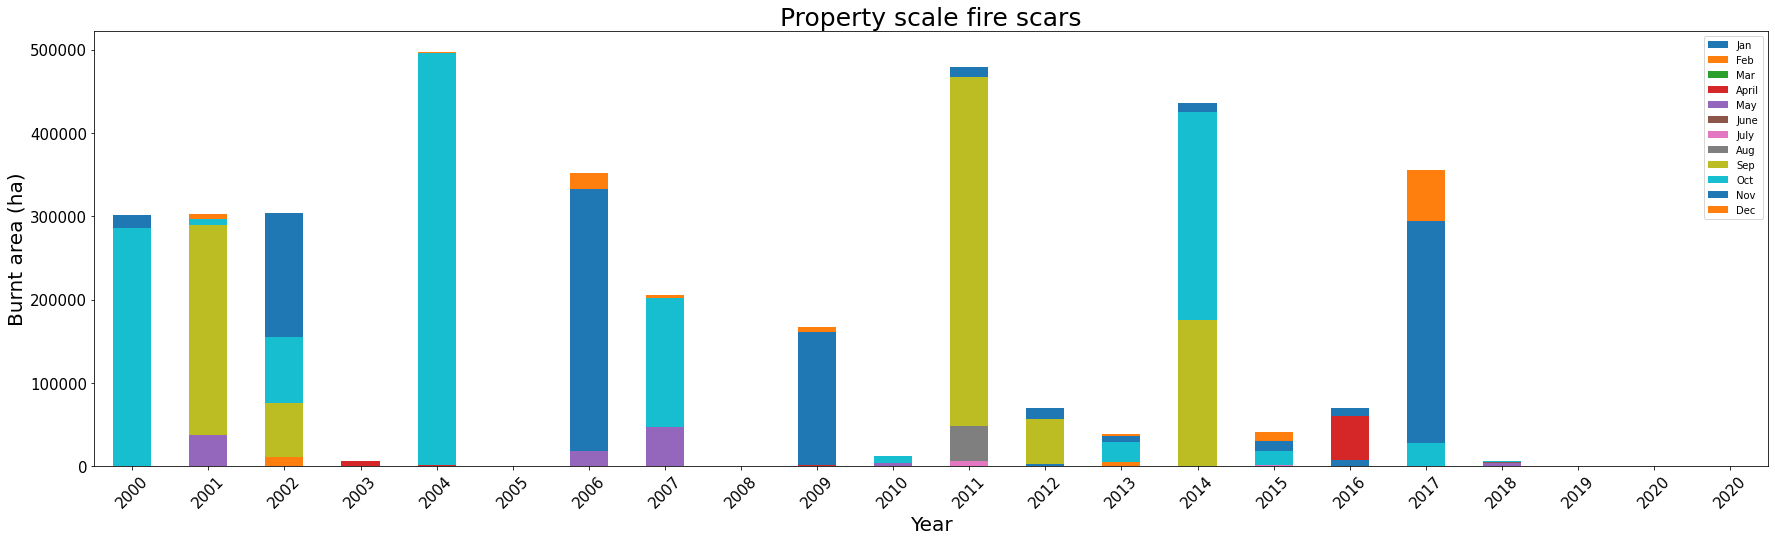

In [19]:
#df.plot(kind='barh', stacked=True)
reshape_df.plot(kind='bar', stacked=True)
plt.legend(loc='best')
plt.title("Property scale fire scars", fontsize=25)
plt.xlabel("Year", fontsize=20)
plt.xticks(rotation=45)
plt.ylabel("Burnt area (ha)", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#plt.grid(True)
plt.show()

Seasons
In Australia, the seasons are defined by grouping the calendar months in the following way:

Spring - the three transition months September, October and November.
Summer - the three hottest months December, January and February.
Autumn - the transition months March, April and May.
Winter - the three coldest months June, July and August.

In [20]:
#reshape_df

In [21]:
reshape_df['Spring']=reshape_df['Sep']+reshape_df['Oct']+reshape_df['Nov']
reshape_df['Summer']=reshape_df['Dec']+reshape_df['Jan']+reshape_df['Feb']
reshape_df['Autumn']=reshape_df['Mar']+reshape_df['April']+reshape_df['May']
reshape_df['Winter']=reshape_df['June']+reshape_df['July']+reshape_df['Aug']

# reshape the final dataframe
seasons_df = reshape_df[['Spring', 'Summer', 'Autumn', 'Winter']]
#seasons_df

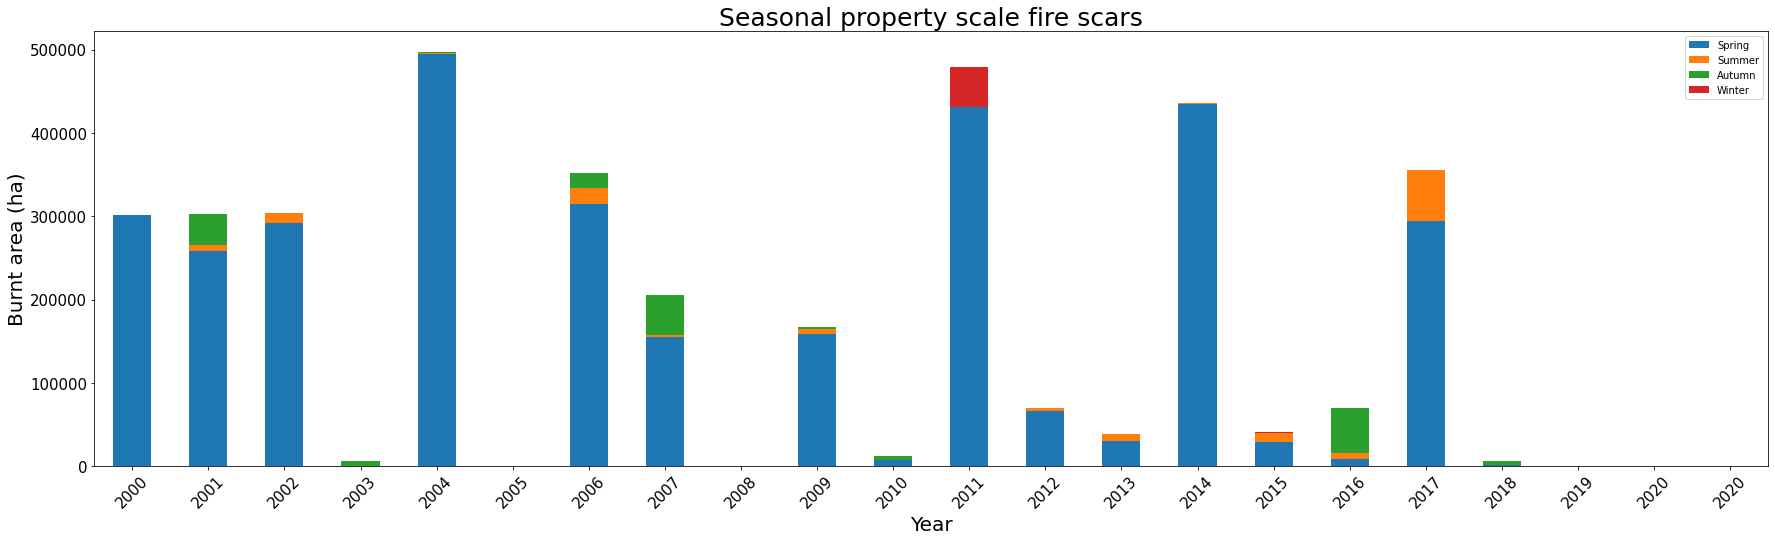

In [22]:
#df.plot(kind='barh', stacked=True)
seasons_df.plot(kind='bar', stacked=True)
plt.legend(loc='best')
plt.title("Seasonal property scale fire scars", fontsize=25)
plt.xlabel("Year", fontsize=20)
plt.xticks(rotation=45)
plt.ylabel("Burnt area (ha)", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#plt.grid(True)
plt.show()

In [23]:
df.head()

,year,image,Oct,Nov,count,property,uid_final,Laiskey,band,May,...,May_area_ha,June_area_ha,July_area_ha,Aug_area_ha,Sep_area_ha,Oct_area_ha,Nov_area_ha,Dec_area_ha,annual_count,annual_area_ha
0,2000,FS2000_MTHS.tif,45666.0,2492.0,97495,cattle creek,1,000 02654,1,0.0,...,0.0,0.00,0.0,0.0,0.00,285412.5,15575.00,0.00,48158.0,300987.50
1,2001,FS2001_MTHS.tif,988.0,0.0,97495,cattle creek,1,000 02654,1,6026.0,...,37662.5,118.75,0.0,0.0,252356.25,6175.0,0.00,6518.75,48453.0,302831.25
2,2002,FS2002_MTHS.tif,12600.0,23831.0,97495,cattle creek,1,000 02654,1,0.0,...,0.0,0.00,0.0,0.0,64262.50,78750.0,148943.75,175.00,48620.0,303875.00
3,2003,FS2003_MTHS.tif,0.0,0.0,97495,cattle creek,1,000 02654,1,0.0,...,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,1020.0,6375.00
4,2004,FS2004_MTHS.tif,79070.0,36.0,97495,cattle creek,1,000 02654,1,24.0,...,150.0,0.00,50.0,0.0,0.00,494187.5,225.00,925.00,79510.0,496937.50


### Property Bare Ground

In [24]:
#df2.rename(columns={'site':'property'}, inplace=True)

In [25]:
#df2['property'].unique()

In [26]:
df2['site'].unique()

array([1], dtype=int64)

In [27]:
# create the date time field and sort the values
df2 = df2[(df2['count'] > 3)]
df2['year'] = df2['imDate'].map(lambda x: str(x)[:4])
df2['month'] = df2['imDate'].map(lambda x: str(x)[4:6])
df2['day'] = df2['imDate'].map(lambda x: str(x)[6:8])
df2['Date'] = df2['year']  + '/' + df2['month'] + '/' + df2['day']
df2.sort_values(['Date'])

,site,imDate,count,imName,year,month,day,Date
0,1,19880109,70985,l5tmre_p106r071_19880109_dilm2_zstdmask.img,1988,01,09,1988/01/09
1,1,19880125,1835170,l5tmre_p106r071_19880125_dilm2_zstdmask.img,1988,01,25,1988/01/25
2,1,19880210,474211,l5tmre_p106r071_19880210_dilm2_zstdmask.img,1988,02,10,1988/02/10
3,1,19880226,1053857,l5tmre_p106r071_19880226_dilm2_zstdmask.img,1988,02,26,1988/02/26
4,1,19880313,1807652,l5tmre_p106r071_19880313_dilm2_zstdmask.img,1988,03,13,1988/03/13
...,...,...,...,...,...,...,...,...
934,1,20200812,1836063,l8olre_p106r071_20200812_dilm2_zstdmask.img,2020,08,12,2020/08/12
933,1,20200820,1671293,l7tmre_p106r071_20200820_dilm2_zstdmask.img,2020,08,20,2020/08/20
935,1,20200828,1816390,l8olre_p106r071_20200828_dilm2_zstdmask.img,2020,08,28,2020/08/28
936,1,20200905,1492574,l7tmre_p106r071_20200905_dilm2_zstdmask.img,2020,09,05,2020/09/05


In [29]:
df2 = df2[(df2['year']>="2000") & (df2['year']<="2020")]
df2.tail()

,site,imDate,count,imName,year,month,day,Date
933,1,20200820,1671293,l7tmre_p106r071_20200820_dilm2_zstdmask.img,2020,08,20,2020/08/20
934,1,20200812,1836063,l8olre_p106r071_20200812_dilm2_zstdmask.img,2020,08,12,2020/08/12
935,1,20200828,1816390,l8olre_p106r071_20200828_dilm2_zstdmask.img,2020,08,28,2020/08/28
936,1,20200905,1492574,l7tmre_p106r071_20200905_dilm2_zstdmask.img,2020,09,05,2020/09/05
937,1,20200913,1738450,l8olre_p106r071_20200913_dilm2_zstdmask.img,2020,09,13,2020/09/13


In [30]:
last_observations = df2.groupby(['year', 'month']).tail(1)
last_observations["total_area_ha"] = (last_observations["count"]*(30*30)/1000)

C:\Users\Rober\anaconda3\envs\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [35]:
df_test = last_observations[['year', 'month', 'count']]
df_test.groupby(['year', 'month']).sum()

count
year month         
2000 01     1833476
     02       17398
     03     1382016
     04      124668
     05     1712781
...             ...
2020 05     1830898
     06     1809380
     07     1807287
     08     1816390
     09     1738450

[245 rows x 1 columns]

In [32]:
df_test.site.unique()

array([1], dtype=int64)

In [33]:
for i in df.test.site:
    i.plot()

AttributeError: 'DataFrame' object has no attribute 'test'

In [36]:
df3 = df_test.pivot(index=['year'], columns='month')
df3.head()

count                                                         \
month         01         02         03         04         05         06   
year                                                                      
2000   1833476.0    17398.0  1382016.0   124668.0  1712781.0  1834322.0   
2001   1834413.0  1421968.0  1804467.0   344799.0  1796321.0  1836409.0   
2002   1742473.0   656175.0  1833151.0  1831847.0  1831758.0  1833367.0   
2003    244530.0  1828585.0   250324.0  1575216.0  1831634.0        NaN   
2004    114042.0        NaN   553883.0  1705273.0   166576.0  1711275.0   

                                                                         
month         07         08         09         10         11         12  
year                                                                     
2000   1832931.0  1832028.0  1829433.0        NaN  1745318.0   477458.0  
2001   1797192.0  1820888.0  1826296.0   742204.0  1080760.0    71499.0  
2002   1828195.0  1816087.0  1832579.0  1831704.0  1833198.0  1832841.0  
2003   1704570.0  1321477.0       83.0  1732176.0  1729063.0   641833.0  
2004   1710006.0  1707873.0  1718126.0  1727176.0   731083.0   795429.0

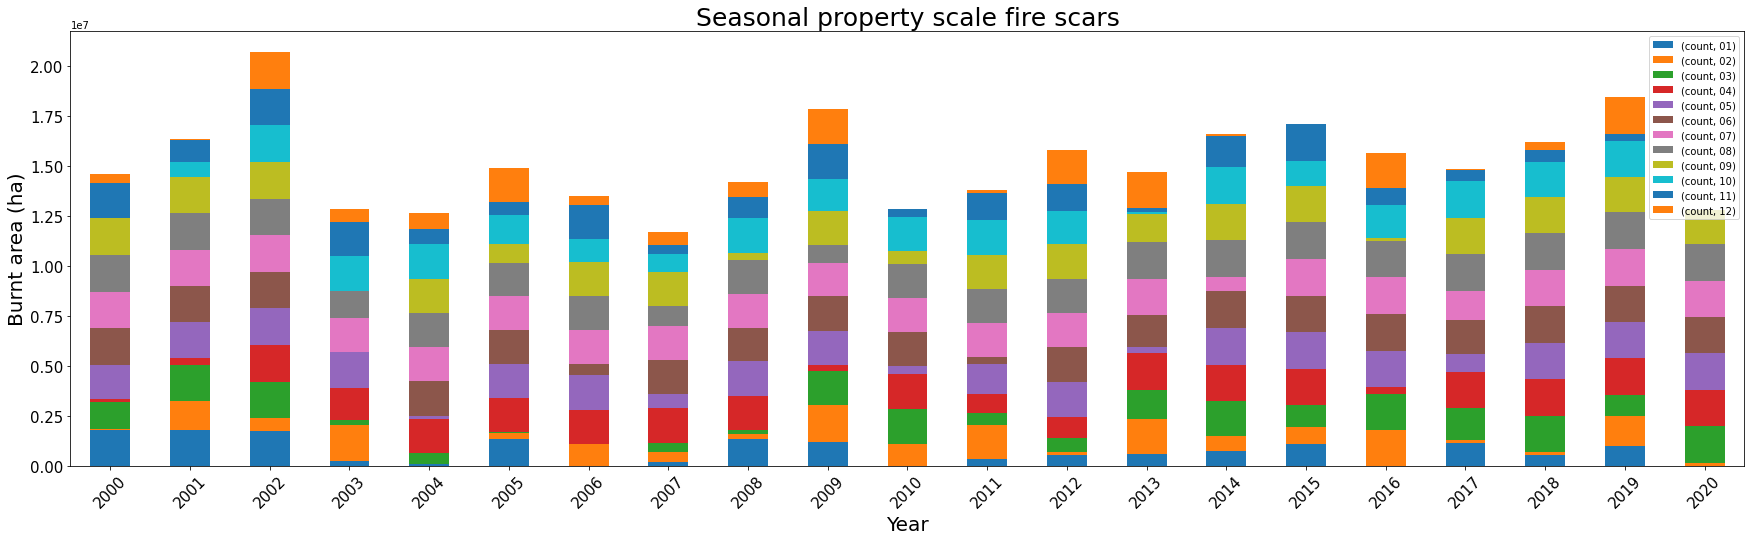

In [37]:
#df.plot(kind='barh', stacked=True)
df3.plot(kind='bar', stacked=True)
plt.legend(loc='best')
plt.title("Seasonal property scale fire scars", fontsize=25)
plt.xlabel("Year", fontsize=20)
plt.xticks(rotation=45)
plt.ylabel("Burnt area (ha)", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#plt.grid(True)
plt.show()

In [ ]:
"""df2['year'] = df2['year'].astype(int)
df2['month'] = df2['month'].astype(int)
df2['day'] = df2['day'].astype(int)"""

In [ ]:
df2.info()

In [ ]:
# Select the last day of each month

df_monthly = df2.reset_index().groupby([df2.year,df2.month],as_index=False).last().set_index('index')
df_monthly["total_area_ha"] = (df_monthly["count"]*(30*30)/10000)
df_monthly

In [ ]:
df_new =df_monthly.groupby(['year', 'month']).total_area_ha.sum().unstack('month', fill_value=0)



In [ ]:
#df.plot(kind='barh', stacked=True)
df_new.plot(kind='bar', stacked=True)
plt.legend(loc='best')
plt.title("Seasonal property scale fire scars", fontsize=25)
plt.xlabel("Year", fontsize=20)
plt.xticks(rotation=45)
plt.ylabel("Burnt area (ha)", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#plt.grid(True)
plt.show()

In [ ]:
column_list =['Month','Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

df_monthly.columns=column_list

In [ ]:
pd.merge(reshape_df, df2, on=['year', 'month'])

## Property

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
properties = pd.read_excel(r"\\pgb-bas01\DENR_Satellite_Imagery$\Scratch\Zonal_Stats_Pipeline\Copy of landsatZonalStatsTiles2.xlsx")
prop_list = properties.Property.unique().tolist()

In [ ]:
prop_list = properties.Property.unique().tolist()
prop_list

In [ ]:
cadastre = gpd.read_file(r'U:\LIB_Common\Cadastre\Datasets\Av_data\Cadastre.shp')
cadastre.head()
cadastre.crs

In [ ]:
cadastre.to_crs ('epsg:32752')

In [ ]:
#crs = {'init': 'epsg:4283'}

In [ ]:
#cadastre_GDA94 = gpd.GeoDataFrame(cadastre, crs=crs)

In [ ]:
#cadastre_GDA94.crs

In [ ]:
fig, ax = plt.subplots(figsize=(12,10))
base = nyc_gdf.boundary.plot(markersize=0.1,ax=ax)
#fire = 
#ax.set_xticklabels([])
#ax.set_yticklabels([])
ax.set_title('Cadastre properties')
plt.show()

In [ ]:
cadastre.info()

In [ ]:
pastoral = cadastre[(cadastre.TENREF_DES=='Pastoral Lease')|(cadastre.TENREF_DES=='Perpetual Pastoral Lease')]


In [ ]:
property_list = pastoral.LAISKEY.unique()
print(property_list)

In [ ]:
'000     1400'

In [ ]:
pastoral_list = ["MARY RIVER WEST", "CAMFIELD", "WONGALARA", "TODD RIVER", "KILLARNEY", "JINDARE", ]

In [ ]:
property_list = cadastre.PROP_NAME.unique()
print(property_list)

In [ ]:
properties = pd.read_excel(r"\\pgb-bas01\DENR_Satellite_Imagery$\Scratch\Zonal_Stats_Pipeline\Copy of landsatZonalStatsTiles2.xlsx")
properties["Property"] = properties["Property"].str.upper()
prop_list = properties.Property.unique().tolist()
prop_list

In [ ]:
# create individual property shapefiles from a list
for i in prop_list:
    #To select rows whose column value equals a scalar, some_value, use ==:
    prop = cadastre1[cadastre1["PROP_NAME"]== i]
    prop.reset_index(drop=True, inplace=True)
    prop['uid']= prop.index + 1
    print (i)
    prop.to_file(r"D:\Rob\fire\property_" + str.lower(i) + "_output_GDA94.shp")


In [ ]:
prop

In [ ]:
# create individual property shapefiles from a list
for i in pastoral_list:
    #To select rows whose column value equals a scalar, some_value, use ==:
    prop = cadastre[cadastre["PROP_NAME"]== i]
    prop['uid']= prop.index + 1

    prop


In [ ]:
prop

In [ ]:
for i in property_list:
    #To select rows whose column value equals a scalar, some_value, use ==:
    #prop = cadastre1[cadastre1["PROP_NAME"]== i]
    print (i)
    mask = prop[cadastre1.PROP_NAME== i]
    

In [ ]:
cadastre = gpd.read_file(r"D:\Rob\fire\three_properties.shp")
property_list = cadastre.PARCEL.unique()
print(property_list)

In [ ]:
for i in property_list:
    #To select rows whose column value equals a scalar, some_value, use ==:
    prop =cadastre[(cadastre["LOC_NAME"]== 'NT Portion') & (cadastre["PARCEL"] == i)]
    #print(prop)
    print("Prop crs: ", prop.crs)
    prop_ = prop.to_crs("EPSG:4283")
    

In [ ]:
def epsg(epsg_code):
    
    """
    function to convert the epsg code to proj4, the orginal example of the code used pycrs 
    to obtain this infromatin for the internet. This version relies on it being in this function. 
    I have covered all the codes relevent to me however it may fail if used elsewhere.
    
    """
    if epsg_code == 32752:
        epsg_code_proj4 = '+proj=utm +zone=52 +south +ellps=WGS84 +datum=WGS84 +units=m +no_defs'
    if epsg_code == 32753:
        epsg_code_proj4 = '+proj=utm +zone=53 +south +ellps=WGS84 +datum=WGS84 +units=m +no_defs'
        
    if epsg_code == 28352:
        epsg_code_proj4 = '+proj=utm +zone=52 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs'   
    
    if epsg_code == 28353:
        epsg_code_proj4 = '+proj=utm +zone=53 +south +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs'        
    
    if epsg_code == 4283:
        epsg_code_proj4 = '+proj=longlat +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +no_defs'     
        
    if epsg_code == 6644:
        epsg_code_proj4 = '+proj=aea +lat_1=-18 +lat_2=-36 +lat_0=0 +lon_0=134 +x_0=0 +y_0=0 +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs' 
    if epsg_code == 3577:
        epsg_code_proj4 = '+proj=aea +lat_1=-18 +lat_2=-36 +lat_0=0 +lon_0=132 +x_0=0 +y_0=0 +ellps=GRS80 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs'
    
    return epsg_code_proj4

In [ ]:
prop =cadastre[(cadastre["LOC_NAME"]== propName) & (cadastre["PARCEL"] == propNum)]
print("Prop crs: ", prop.crs)

## Project Tif

In [ ]:
import gdal

In [ ]:
ds = gdal.Open(r"Z:\Scratch\Zonal_Stats_Pipeline\Firescars\no_spatial\FS2006_MTH.tif")

In [ ]:
from osgeo import ogr, osr
ds.GetProjection()

In [ ]:
roads = gdal.Open(r"Z:\Scratch\Zonal_Stats_Pipeline\Firescars\no_spatial\FS2000_MTH.tif", gdal.GA_Update)